In [1]:
import pandas as pd
import numpy as np
from numba import njit
import csv
import pickle
import matplotlib.pyplot as plt
import MLestimation as mle #takes 1 minute to load 

## Location for downloaded data files other input files:

In [3]:

PARCOMBS_LOC = r"C:\Users\BE\Documents\Corentin\densificationscalingMLE-master\Densification_proj\parameter_combinations\paramcombs.csv"
WORKPLACE_PARCOMBS_LOC = r"C:\Users\BE\Documents\Corentin\densificationscalingMLE-master\Densification_proj\parameter_combinations\paramcombs_workplace.csv"

LKFNS_LOC = r"C:\Users\BE\Documents\Corentin\densificationscalingMLE-master\Densification_proj\likelihoodfns\Likefn"
WORKPLACE_LKFNS_LOC = r"C:\Users\BE\Documents\Corentin\densificationscalingMLE-master\Densification_proj\likelihoodfns_workplace\Likefn"


## User imports the datasets

In [5]:
import os
import time
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === Configuration ===
DATA_DIR = r"C:\Users\BE\Documents\Corentin\Spacial_Analysis_For_Face_To_Face_Network-main\notebooks\densification_data"
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".csv")]

print(f"üîç Found {len(files)} CSV file(s) in '{DATA_DIR}'.")

# === Collect results per file ===
estimates_per_file = []

for file in sorted(files):
    start_time = time.time()
    filepath = os.path.join(DATA_DIR, file)
    label = file.replace(".csv", "")
    print(f"\nüìÑ Processing '{file}'...")

    try:
        data = pd.read_csv(filepath, header=None, names=["N", "M"])

        # Basic checks
        if data.shape[1] != 2:
            print(f"  ‚ùå Skipped: expected 2 columns, got {data.shape[1]}")
            continue
        if data.isnull().any().any():
            print(f"  ‚ö†Ô∏è  Warning: NaN values detected")
        if (data["M"] < 0).any():
            print(f"  ‚ö†Ô∏è  Warning: Negative edge counts")

        # Estimate
        est = mle.estimates(data.values)
        if est.empty or len(est) != len(data):
            print(f"  ‚ùå Skipped: estimation failed or output shape mismatch")
            continue

        estimates_per_file.append({
            "label": label,
            "data": data,
            "estimates": est
        })

        print(f"  ‚úÖ Success ({len(data)} snapshots) in {time.time() - start_time:.2f} s")

    except Exception as e:
        print(f"  ‚ùå Error while processing: {e}")


üîç Found 3 CSV file(s) in 'C:\Users\BE\Documents\Corentin\Spacial_Analysis_For_Face_To_Face_Network-main\notebooks\densification_data'.

üìÑ Processing 'nm_foyer_1.csv'...
  ‚úÖ Success (119 snapshots) in 25.99 s

üìÑ Processing 'nm_mainroom_3.csv'...
  ‚úÖ Success (108 snapshots) in 20.47 s

üìÑ Processing 'nm_posterroom_2.csv'...
  ‚úÖ Success (47 snapshots) in 8.62 s


üìä Plot is ready. Showing interactive viewer...


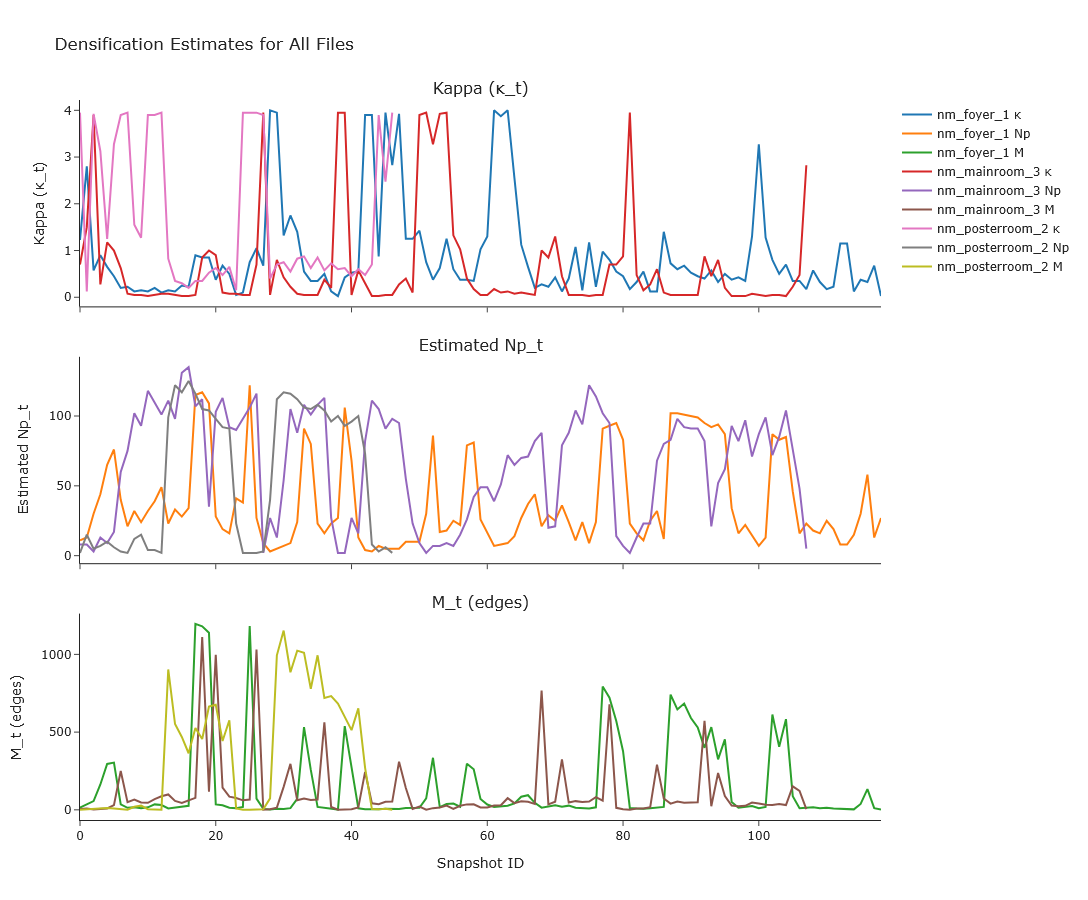

In [11]:
# === Create multi-panel Plotly figure ===
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.07,
    subplot_titles=["Kappa (Œ∫_t)", "Estimated Np_t", "M_t (edges)"]
)

for item in estimates_per_file:
    label = item["label"]
    data = item["data"]
    est = item["estimates"]

    fig.add_trace(go.Scatter(
        y=est["kappa"], mode="lines", name=f"{label} Œ∫"
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        y=est["np"], mode="lines", name=f"{label} Np"
    ), row=2, col=1)

    fig.add_trace(go.Scatter(
        y=data["M"], mode="lines", name=f"{label} M"
    ), row=3, col=1)

# === Style and show ===
fig.update_layout(
    height=900,
    width=1000,
    title_text="Densification Estimates for All Files",
    showlegend=True,
    template="simple_white"
)

fig.update_xaxes(title_text="Snapshot ID", row=3, col=1)
fig.update_yaxes(title_text="Kappa (Œ∫_t)", row=1, col=1)
fig.update_yaxes(title_text="Estimated Np_t", row=2, col=1)
fig.update_yaxes(title_text="M_t (edges)", row=3, col=1)

print("üìä Plot is ready. Showing interactive viewer...")
fig.show()
